In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install git+https://github.com/facebookresearch/detectron2.git

Looking in indexes: https://download.pytorch.org/whl/cu124

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-cf0s252d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-cf0s252d
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install openvino==2025.1.0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install numpy tqdm opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!apt-get update && apt-get install -y libgl1

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                     
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Fetched 384 kB in 3s (131 kB/s)                                     
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1 is already the newest version (1.4.0-1).
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.


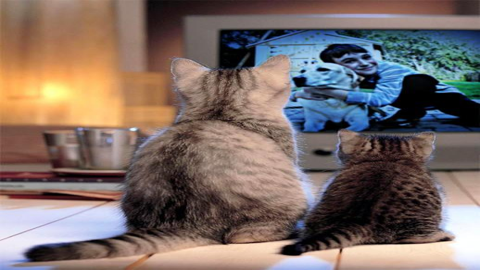

✅ Mô hình đã được chuyển đổi và lưu thành công tại: output_vehicle_faster_rcnn_R_50_FPN_3x_7nd_OPENVINO/custom_model.xml
✅ Inference thành công với OpenVINO!


In [5]:
# import torch
# import openvino as ov
# from detectron2.config import get_cfg
# from detectron2.modeling import build_model
# from detectron2.checkpoint import DetectionCheckpointer
# from detectron2.modeling import GeneralizedRCNN
# from detectron2.export import TracingAdapter
# from detectron2.data import detection_utils
# import detectron2.data.transforms as T
# import numpy as np
# from pathlib import Path
# from PIL import Image
# import requests
# import warnings
# from typing import List, Dict


# def get_model_and_config(model_name: str):
#     """
#     Helper function for downloading PyTorch model and its configuration from Detectron2 Model Zoo

#     Parameters:
#       model_name (str): model_id from Detectron2 Model Zoo
#     Returns:
#       model (torch.nn.Module): Pretrained model instance
#       cfg (Config): Configuration for model
#     """
#     cfg = detectron_zoo.get_config(model_name + '.yaml', trained=True)
#     model = detectron_zoo.get(model_name + '.yaml', trained=True)
#     return model, cfg

# def convert_detectron2_model(model: torch.nn.Module, sample_input: List[Dict[str, torch.Tensor]]):
#     """
#     Function for converting Detectron2 models, creates TracingAdapter for making model tracing-friendly,
#     prepares inputs and converts model to OpenVINO Model

#     Parameters:
#       model (torch.nn.Module): Model object for conversion
#       sample_input (List[Dict[str, torch.Tensor]]): sample input for tracing
#     Returns:
#       ov_model (ov.Model): OpenVINO Model
#     """
#     # Prepare input for tracing adapter
#     tracing_input = [{'image': sample_input[0]["image"]}]

#     # Override model forward and disable postprocessing if required
#     if isinstance(model, GeneralizedRCNN):
#         def inference(model, inputs):
#             # Use do_postprocess=False so it returns ROI mask
#             inst = model.inference(inputs, do_postprocess=False)[0]
#             return [{"instances": inst}]
#     else:
#         inference = None  # Assume that we just call the model directly

#     # Create traceable model
#     traceable_model = TracingAdapter(model, tracing_input, inference)
#     warnings.filterwarnings("ignore")
#     # Convert PyTorch model to OpenVINO model
#     ov_model = ov.convert_model(traceable_model, example_input=sample_input[0]["image"])
#     return ov_model

# MODEL_DIR = Path("output_vehicle_faster_rcnn_R_50_FPN_3x_7nd_OPENVINO")
# DATA_DIR = Path("data")

# MODEL_DIR.mkdir(exist_ok=True)
# DATA_DIR.mkdir(exist_ok=True)

# input_image_url = "https://farm9.staticflickr.com/8040/8017130856_1b46b5f5fc_z.jpg"

# image_file = DATA_DIR / "example_image.jpg"

# if not image_file.exists():
#     image = Image.open(requests.get(input_image_url, stream=True).raw)
#     image.save(image_file)
# else:
#     image = Image.open(image_file)

# # Resize image to match model's input size
# image = image.resize((480, 270))  # Resize to match the input size for OpenVINO model

# image.show()

# def get_sample_inputs(image_path, cfg):
#     # Get a sample data
#     original_image = detection_utils.read_image(image_path, format=cfg.INPUT.FORMAT)
#     # Perform the same preprocessing as DefaultPredictor
#     aug = T.ResizeShortestEdge([cfg.INPUT.MIN_SIZE_TEST, cfg.INPUT.MIN_SIZE_TEST], cfg.INPUT.MAX_SIZE_TEST)
#     height, width = original_image.shape[:2]
#     image = aug.get_transform(original_image).apply_image(original_image)
#     image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))

#     inputs = {"image": image, "height": height, "width": width}

#     # Sample ready
#     sample_inputs = [inputs]
#     return sample_inputs

# # Load custom model
# def load_custom_model(config_path, checkpoint_path):
#     cfg = get_cfg()
#     cfg.merge_from_file(config_path)
#     cfg.MODEL.WEIGHTS = checkpoint_path
#     cfg.MODEL.DEVICE = "cpu"
#     model = build_model(cfg)
#     DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)
#     model.eval()
#     return model, cfg

# # Paths to configuration and checkpoint
# CONFIG_PATH = "output_vehicle_faster_rcnn_R_50_FPN_3x_7nd/config.yaml"  # Path to your config file
# CHECKPOINT_PATH = "output_vehicle_faster_rcnn_R_50_FPN_3x_7nd/model_final.pth"  # Path to your model weights
# IMAGE_PATH = "example_image.jpg"  # Path to example image

# # Load the model
# model, cfg = load_custom_model(CONFIG_PATH, CHECKPOINT_PATH)

# # Prepare a sample input
# sample_input = get_sample_inputs(IMAGE_PATH, cfg)

# # Convert the model to OpenVINO
# ov_model = convert_detectron2_model(model, sample_input)
# ov.save_model(ov_model, MODEL_DIR / "custom_model.xml")
# print(f"✅ Mô hình đã được chuyển đổi và lưu thành công tại: {MODEL_DIR / 'custom_model.xml'}")

# # (Optional) Perform inference with OpenVINO
# core = ov.Core()
# compiled_model = core.compile_model(ov_model, "CPU")
# results = compiled_model(sample_input[0]["image"])
# print("✅ Inference thành công với OpenVINO!")


In [ ]:
import torchvision
import torch
import openvino as ov

model = torchvision.models.resnet50(weights='DEFAULT')
ov_model = ov.convert_model(model)